# **PROJECT**
### **개천저수지 저수율 분석 및 이상 탐지**





In [44]:
# 프로그램 처음 시작 시 셀 실행 -> (런타임 - 런타임 다시 시작)실행 후 나머지 셀 실행
# 한글(나눔바른고딕체) 폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [45]:
# 한글 폰트 설정
%matplotlib inline
import matplotlib.pylab as plt
plt.rc('font', family='NanumBarunGothic')

In [46]:
# 데이터 불러오기
import pandas as pd

path = '/content/drive/MyDrive/ABCLABS/Project/경북_의성_개천저수지.xlsx'
data = pd.read_excel(path)
data.head()

,stnId,stnNm,tm,avgTa,minTa,maxTa,mi10MaxRn,hr1MaxRn,sumRn,maxInsWs,maxWs,avgWs,avgTd,minRhm,avgRhm,avgPv,avgPa,maxPs,minPs,avgPs,ssDur,sumSsHr,avgTs,minTg,RATE,WATER_LEVEL,DIFF_RATE,DIFF_LV
0,278,의성,2013-01-01,-8.6,-16.7,-0.4,NaN,NaN,1.0,3.7,2.2,0.5,-10.8,63,84.0,2.9,1010.1,1023.5,1018.2,1020.8,9.7,2.8,-2.0,-10.5,98.0,60.2,0.0,0.0
1,278,의성,2013-01-02,-8.2,-18.0,-3.2,NaN,NaN,0.1,10.2,5.8,2.6,-16.8,30,54.0,1.7,1018.4,1034.9,1019.7,1029.2,9.8,8.3,-0.8,-7.5,98.0,60.2,0.0,0.0
2,278,의성,2013-01-03,-14.4,-21.1,-5.7,NaN,NaN,NaN,8.7,5.1,1.5,-21.5,26,59.1,1.1,1024.7,1038.1,1034.0,1035.8,9.8,8.3,-2.0,-9.7,98.0,60.2,0.0,0.0
3,278,의성,2013-01-04,-14.4,-23.2,-2.7,NaN,NaN,NaN,3.4,1.9,0.6,-20.6,25,63.9,1.2,1020.9,1035.9,1029.0,1031.9,9.8,8.2,-2.5,-11.0,98.0,60.2,0.0,0.0
4,278,의성,2013-01-05,-10.3,-20.6,0.9,NaN,NaN,NaN,7.9,4.6,1.0,-16.2,30,65.9,1.8,1015.6,1029.2,1022.4,1026.4,9.8,8.2,-2.3,-10.4,98.0,60.2,0.0,0.0


In [47]:
#데이터 정보
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2921 entries, 0 to 2920
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   stnId        2921 non-null   int64  
 1   stnNm        2921 non-null   object 
 2   tm           2921 non-null   object 
 3   avgTa        2920 non-null   float64
 4   minTa        2921 non-null   float64
 5   maxTa        2921 non-null   float64
 6   mi10MaxRn    614 non-null    float64
 7   hr1MaxRn     614 non-null    float64
 8   sumRn        897 non-null    float64
 9   maxInsWs     2919 non-null   float64
 10  maxWs        2919 non-null   float64
 11  avgWs        2918 non-null   float64
 12  avgTd        2920 non-null   float64
 13  minRhm       2921 non-null   int64  
 14  avgRhm       2920 non-null   float64
 15  avgPv        2920 non-null   float64
 16  avgPa        2918 non-null   float64
 17  maxPs        2921 non-null   float64
 18  minPs        2920 non-null   float64
 19  avgPs 

# **HeatMap**

In [48]:
df = data
df = df.drop(["stnId","stnNm","tm"],axis=1)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


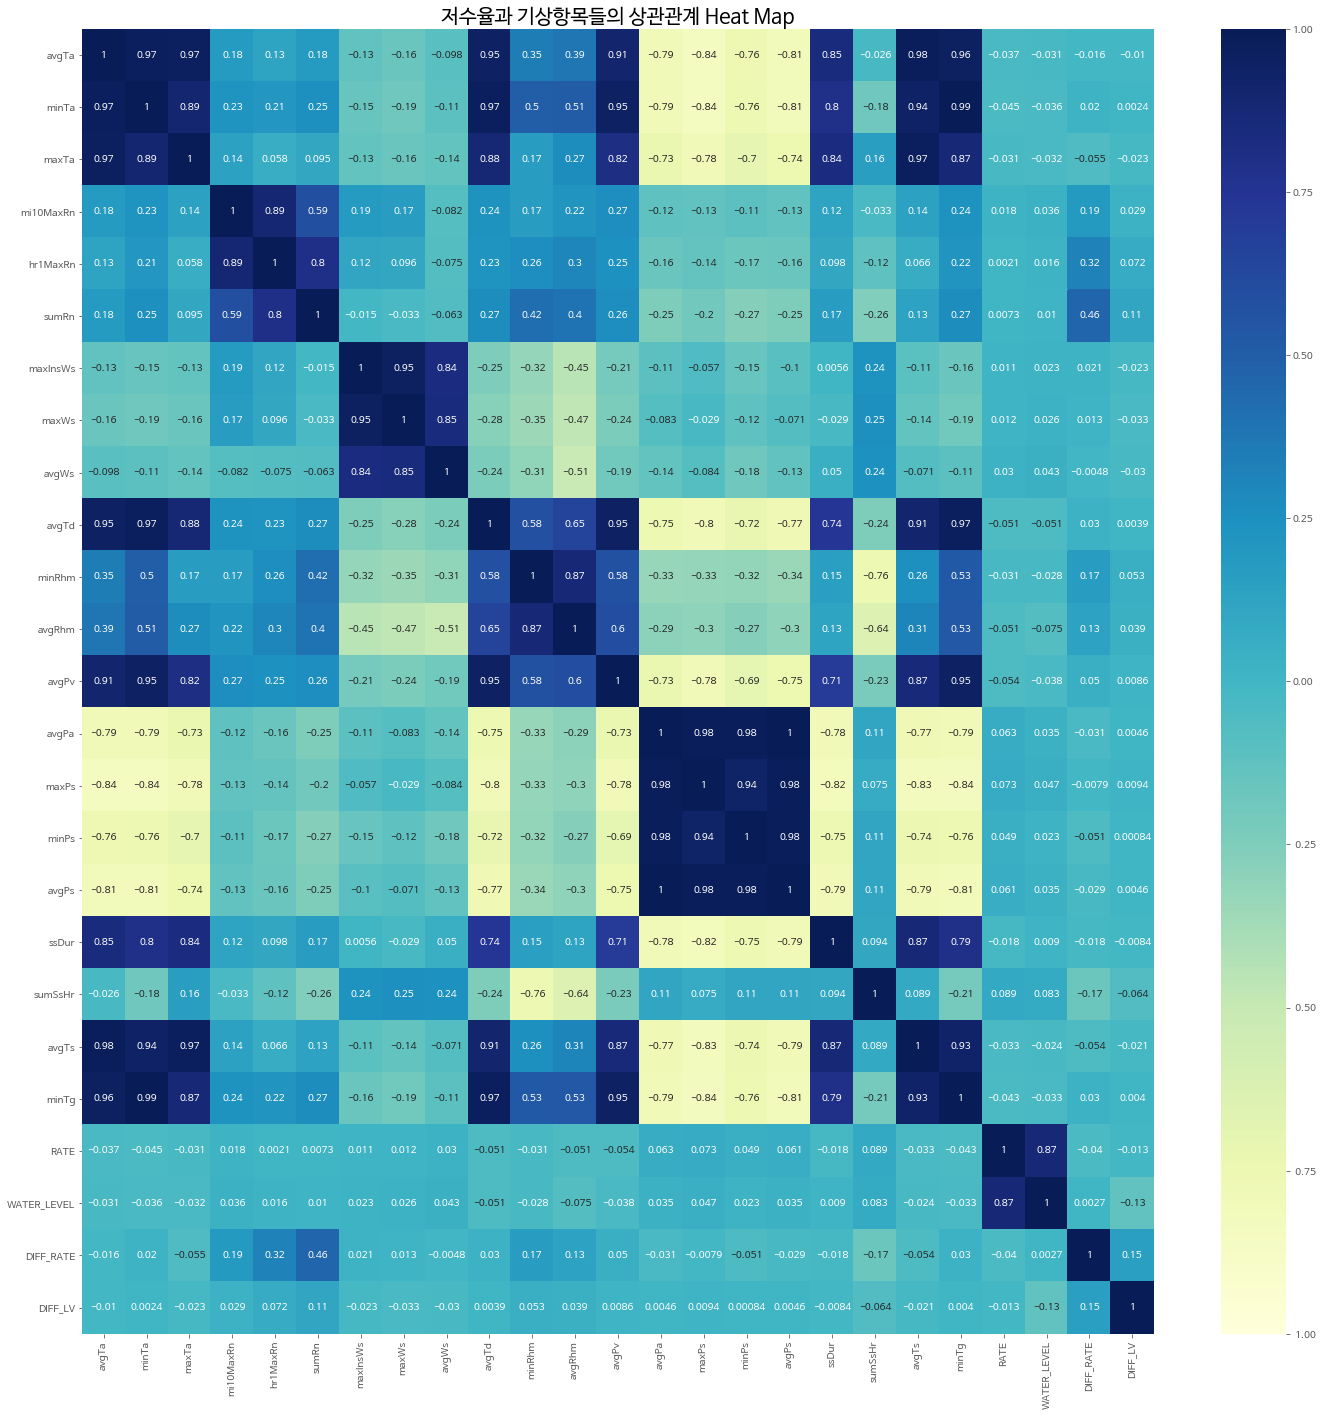

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker


plt.figure(figsize=(24,24))
plt.title('저수율과 기상항목들의 상관관계 Heat Map', size=20)
sns.heatmap(df.corr(), vmin=-1, vmax=1,  annot = True,cmap='YlGnBu')
#prit(df.corr('RATE')n)

In [50]:
df = data.loc[:,["tm","sumRn","RATE",'DIFF_RATE']]
df['tm'] = pd.to_datetime(df['tm'])
df['DIFF_RATE'] = df['DIFF_RATE']*10
df.index = df['tm']
df.set_index('tm',inplace=True)
df

# 결측값 0으로 초기화
df.fillna(0)

,sumRn,RATE,DIFF_RATE
tm,,,
2013-01-01,1.0,98.0,0.0
2013-01-02,0.1,98.0,0.0
2013-01-03,0.0,98.0,0.0
2013-01-04,0.0,98.0,0.0
2013-01-05,0.0,98.0,0.0
...,...,...,...
2020-12-27,0.0,87.7,0.0
2020-12-28,0.0,87.7,0.0
2020-12-29,1.2,87.7,0.0


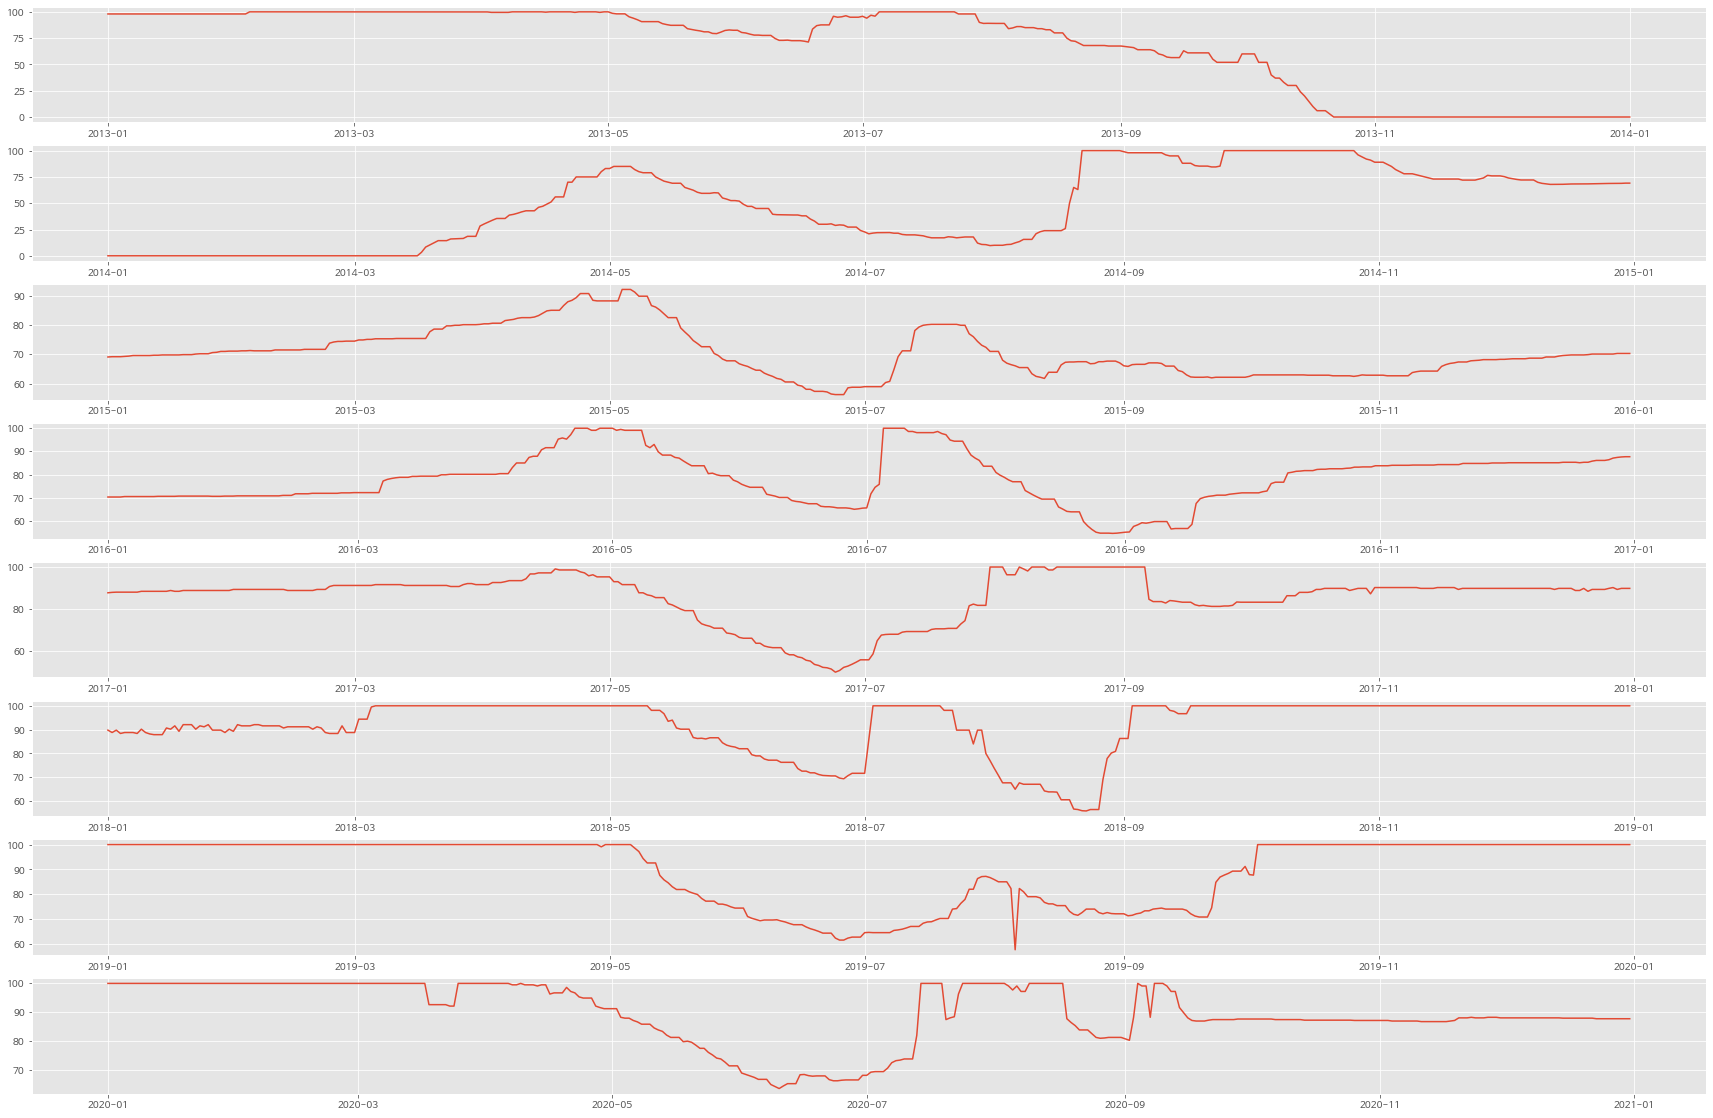

In [51]:
# 기본 데이터 (2013 ~ 2020) 시각화

from statsmodels.tsa.seasonal import seasonal_decompose
plt.style.use('ggplot')

ts = df[:'2014-01-01']
ts_1 = df['2014-01-01':'2014-12-31']
ts_2 = df['2015-01-01':'2015-12-31']
ts_3 = df['2016-01-01':'2016-12-31']
ts_4 = df['2017-01-01':'2017-12-31']
ts_5 = df['2018-01-01':'2018-12-31']
ts_6 = df['2019-01-01':'2019-12-31']
ts_7 = df['2020-01-01':'2020-12-31']

plt.rcParams['figure.figsize'] = [30, 20]
plt.subplot(811)
plt.plot(ts['RATE'])
plt.subplot(812)
plt.plot(ts_1['RATE'])
plt.subplot(813)
plt.plot(ts_2['RATE'])
plt.subplot(814)
plt.plot(ts_3['RATE'])
plt.subplot(815)
plt.plot(ts_4['RATE'])
plt.subplot(816)
plt.plot(ts_5['RATE'])
plt.subplot(817)
plt.plot(ts_6['RATE'])
plt.subplot(818)
plt.plot(ts_7['RATE'])

plt.show()

**저수위, 저수율, 변화율**

In [52]:
df = data.loc[:,["tm","sumRn","RATE",'DIFF_RATE']]
df['tm'] = pd.to_datetime(df['tm'])
df['DIFF_RATE'] = df['DIFF_RATE']*10

df.index = df['tm']
df.set_index('tm',inplace=True)
df


,sumRn,RATE,DIFF_RATE
tm,,,
2013-01-01,1.0,98.0,0.0
2013-01-02,0.1,98.0,0.0
2013-01-03,NaN,98.0,0.0
2013-01-04,NaN,98.0,0.0
2013-01-05,NaN,98.0,0.0
...,...,...,...
2020-12-27,NaN,87.7,0.0
2020-12-28,NaN,87.7,0.0
2020-12-29,1.2,87.7,0.0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


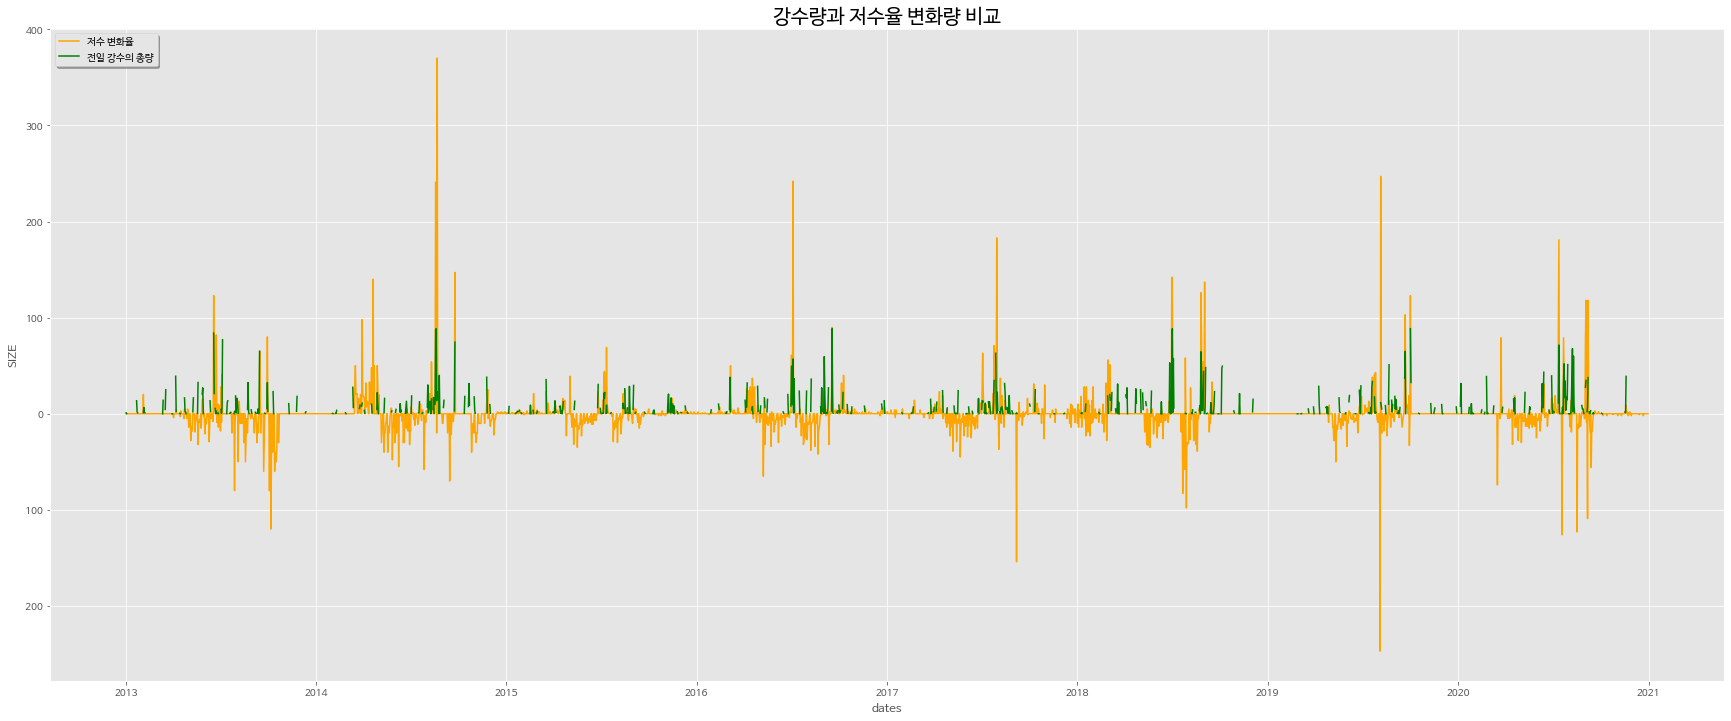

In [53]:
plt.figure(figsize=(30,12))
m_df = df

plt.title('강수량과 저수율 변화량 비교', size=20)

plt.xlabel('dates')
plt.ylabel('SIZE')

plt.plot(m_df.index, m_df['DIFF_RATE'],color = 'orange', label='저수 변화율')
plt.plot(m_df.index, m_df['sumRn'],color = 'green', label='전일 강수의 총량')
plt.legend(shadow=True, fancybox=True, loc="upper left")

plt.show() 

# 데이터 분석

*   데이터 전처리
*   농사를 짓지 않는 달은 제외



In [54]:
import datetime
df = data.loc[:,["tm","sumRn","RATE",'DIFF_RATE']]
df['tm'] = pd.to_datetime(df['tm'])
df.fillna(0)
df['Month'] = df['tm'].dt.month
df = df[(df['sumRn']>2)&(df['DIFF_RATE']>0.1)]

# 1~3월, 10~12월
df = df[((df['Month']>=9) & (df['Month']<=12))|((df['Month']>=1) & (df['Month']<=4))]

df = df[['tm','sumRn','RATE','DIFF_RATE']]
plt.figure(figsize=(10,10))
df.corr()
#sns.heatmap(df.corr(), vmin=-1, vmax=1,  annot = True,cmap='YlGnBu')

,sumRn,RATE,DIFF_RATE
sumRn,1.000000,0.078781,0.695465
RATE,0.078781,1.000000,-0.023428
DIFF_RATE,0.695465,-0.023428,1.000000


<Figure size 720x720 with 0 Axes>

In [55]:
df = df.fillna(0)
df = df[['sumRn','DIFF_RATE']]

# Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression
line_fitter = LinearRegression()
X = df['sumRn']
y = df['DIFF_RATE']
line_fitter.fit(X.values.reshape(-1,1), y)

# sumRn = 0
# line_fitter.predict([[sumRn]])
cf = line_fitter.coef_
it = line_fitter.intercept_
print("coef : "+str(cf[0])+"\n"+"intercept : "+str(it))

coef : 0.12202664829035681
intercept : -0.011024182402794125


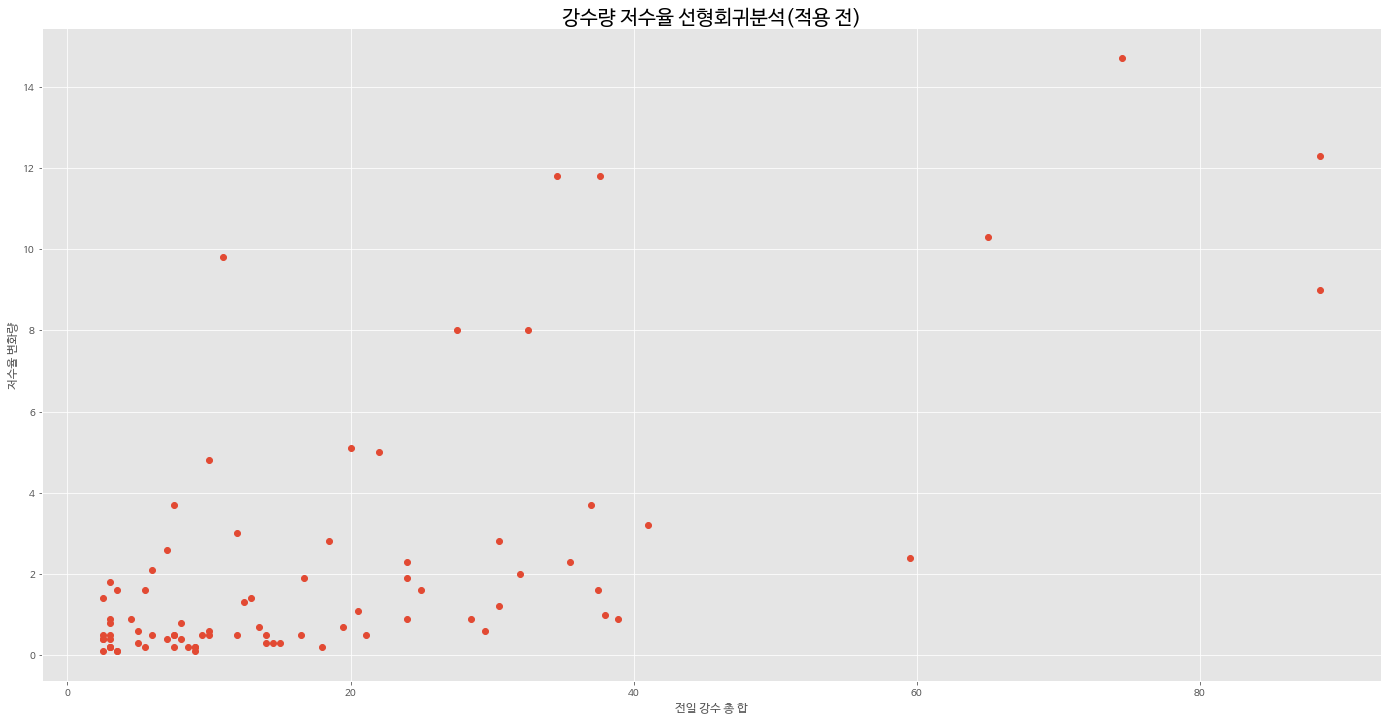

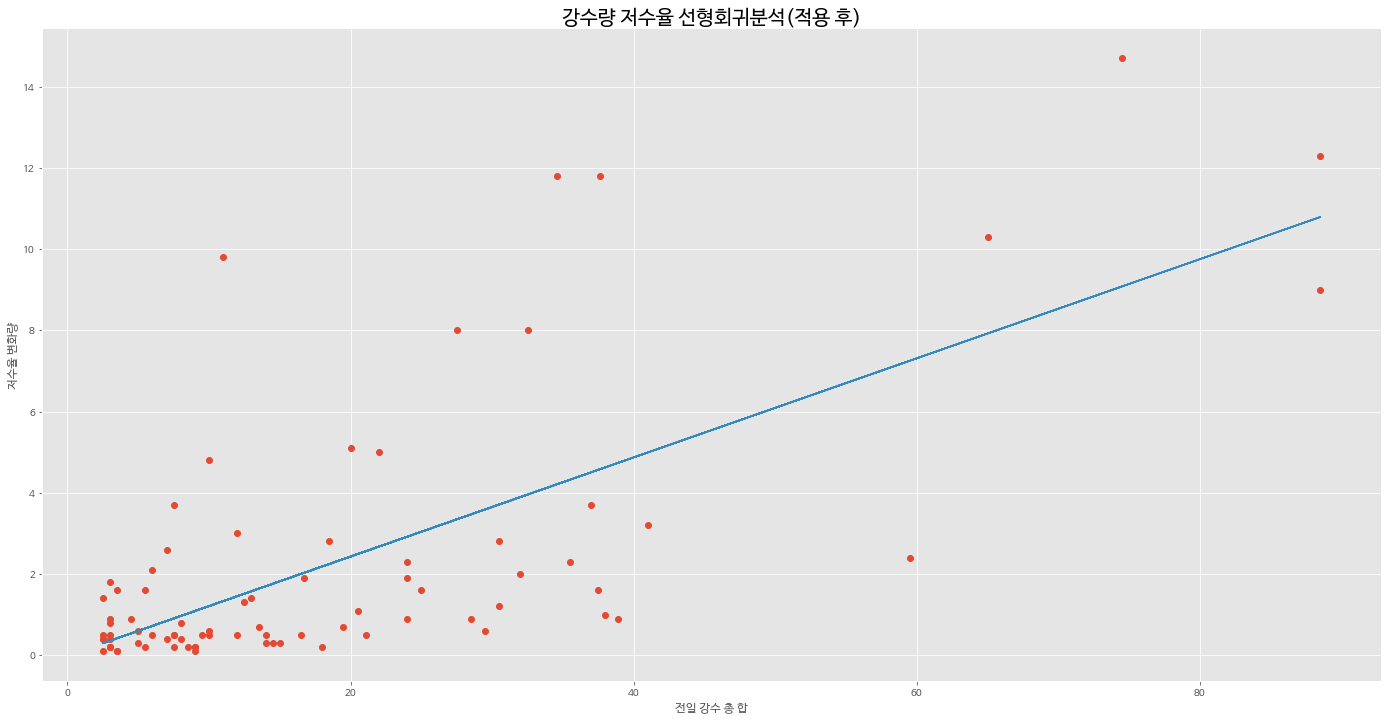

In [57]:
plt.figure(figsize=(24,12))
plt.title('강수량 저수율 선형회귀분석(적용 전)', size=20)
plt.xlabel('전일 강수 총 합')
plt.ylabel('저수율 변화량')
plt.plot(X, y, 'o')

plt.show()

print()

plt.figure(figsize=(24,12))
plt.title('강수량 저수율 선형회귀분석(적용 후)', size=20)
plt.xlabel('전일 강수 총 합')
plt.ylabel('저수율 변화량')
plt.plot(X, y, 'o')

plt.plot(X,line_fitter.predict(X.values.reshape(-1,1)))

plt.show()

In [58]:
df = data.loc[:,["tm","sumRn","RATE",'DIFF_RATE']]
df = df.fillna(0)
df['PRED_DIFF_RATE'] = line_fitter.predict(df['sumRn'].values.reshape(-1,1))
df.index = df['tm']
df.set_index('tm',inplace=True)
df.index = pd.to_datetime(df.index)
df['sumRn'] = df['sumRn']/10
df = df[['sumRn','DIFF_RATE','PRED_DIFF_RATE']]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


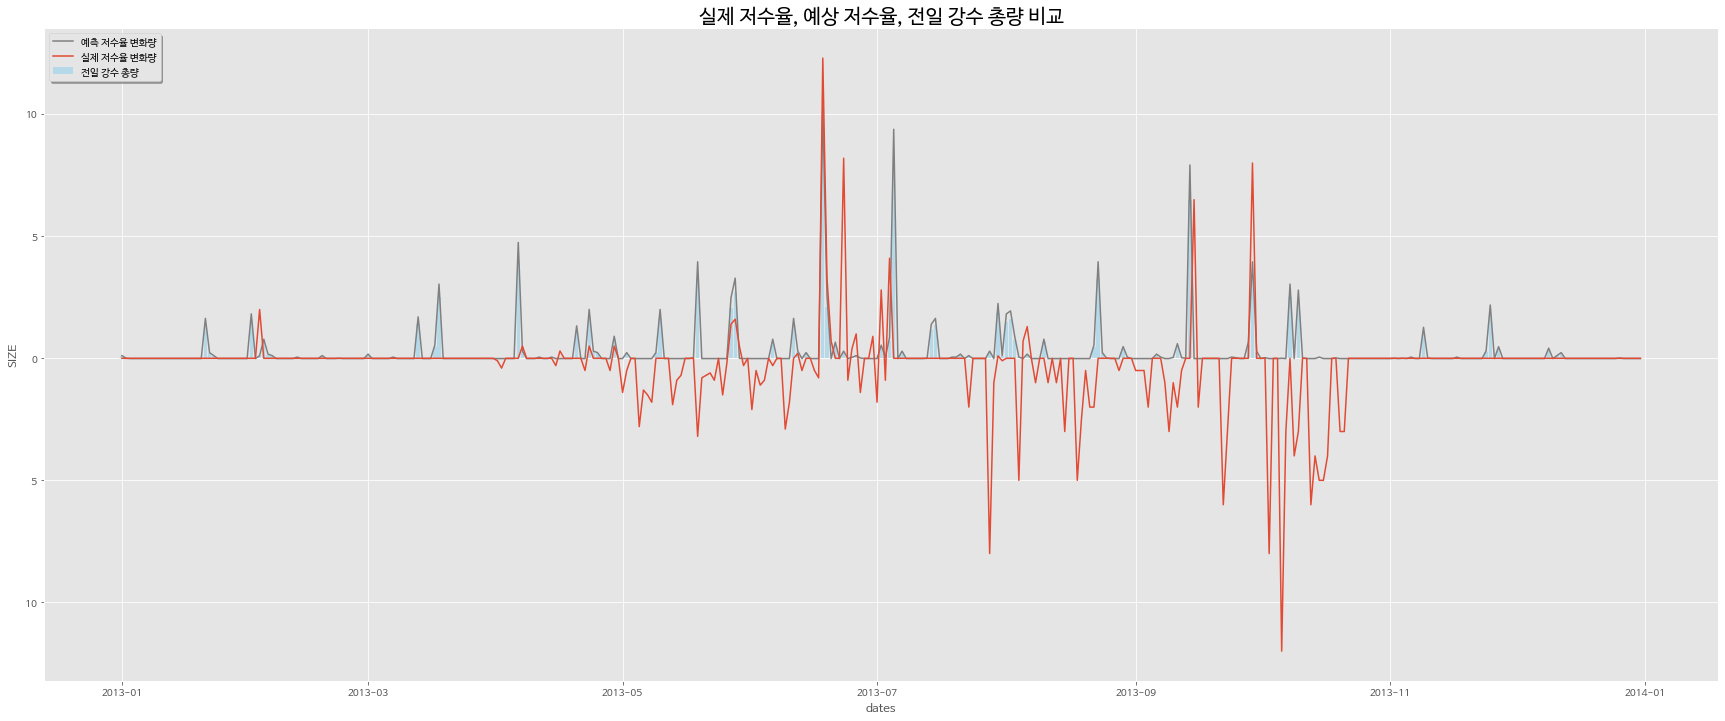

In [59]:
a_df = df
plt.figure(figsize=(30,12))
a_df = a_df[:365]

plt.title('실제 저수율, 예상 저수율, 전일 강수 총량 비교', size=20)

plt.bar(a_df.index, a_df['sumRn'], alpha = 0.5, color = 'skyblue', label='전일 강수 총량')
plt.plot(a_df.index, a_df['PRED_DIFF_RATE'],color = 'gray', label='예측 저수율 변화량')
plt.plot(a_df.index, a_df['DIFF_RATE'], label='실제 저수율 변화량')

plt.xlabel('dates')
plt.ylabel('SIZE')



plt.legend(shadow=True, fancybox=True, loc="upper left")

plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


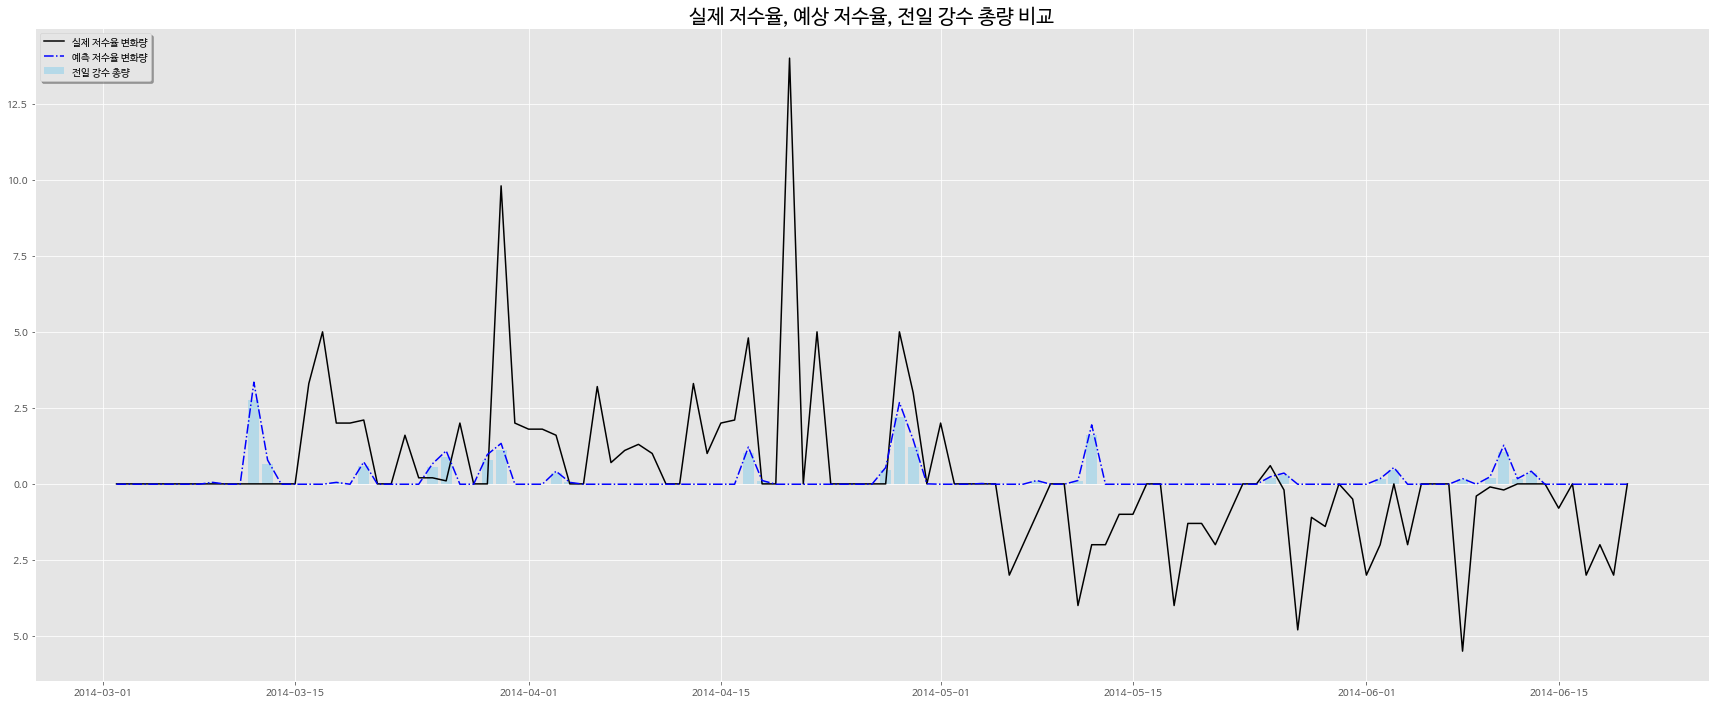

In [70]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# start_date = datetime.date(2018, 2, 1)
# end_date = datetime.date(2018, 4, 1)

start_date = datetime.date(2014, 3, 2)
end_date = datetime.date(2014, 6, 20)

plt.figure(figsize=(30,12))
plt.title('실제 저수율, 예상 저수율, 전일 강수 총량 비교', size=20)

m_df = df

range = pd.date_range(start_date, end_date)

plt.bar(range, m_df['sumRn'][range], color='skyblue',alpha=0.5,label='전일 강수 총량')
plt.plot(range, m_df['DIFF_RATE'][range], color='black', ls='-', label='실제 저수율 변화량')
plt.plot(range, m_df['PRED_DIFF_RATE'][range], color='blue', ls='-.', label='예측 저수율 변화량')

plt.legend(shadow=True, fancybox=True, loc="upper left")

plt.show() 

In [61]:
df['diff'] =df['DIFF_RATE']-df['PRED_DIFF_RATE']
df

,sumRn,DIFF_RATE,PRED_DIFF_RATE,diff
tm,,,,
2013-01-01,0.10,0.0,0.111002,-0.111002
2013-01-02,0.01,0.0,0.001178,-0.001178
2013-01-03,0.00,0.0,-0.011024,0.011024
2013-01-04,0.00,0.0,-0.011024,0.011024
2013-01-05,0.00,0.0,-0.011024,0.011024
...,...,...,...,...
2020-12-27,0.00,0.0,-0.011024,0.011024
2020-12-28,0.00,0.0,-0.011024,0.011024
2020-12-29,0.12,0.0,0.135408,-0.135408


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


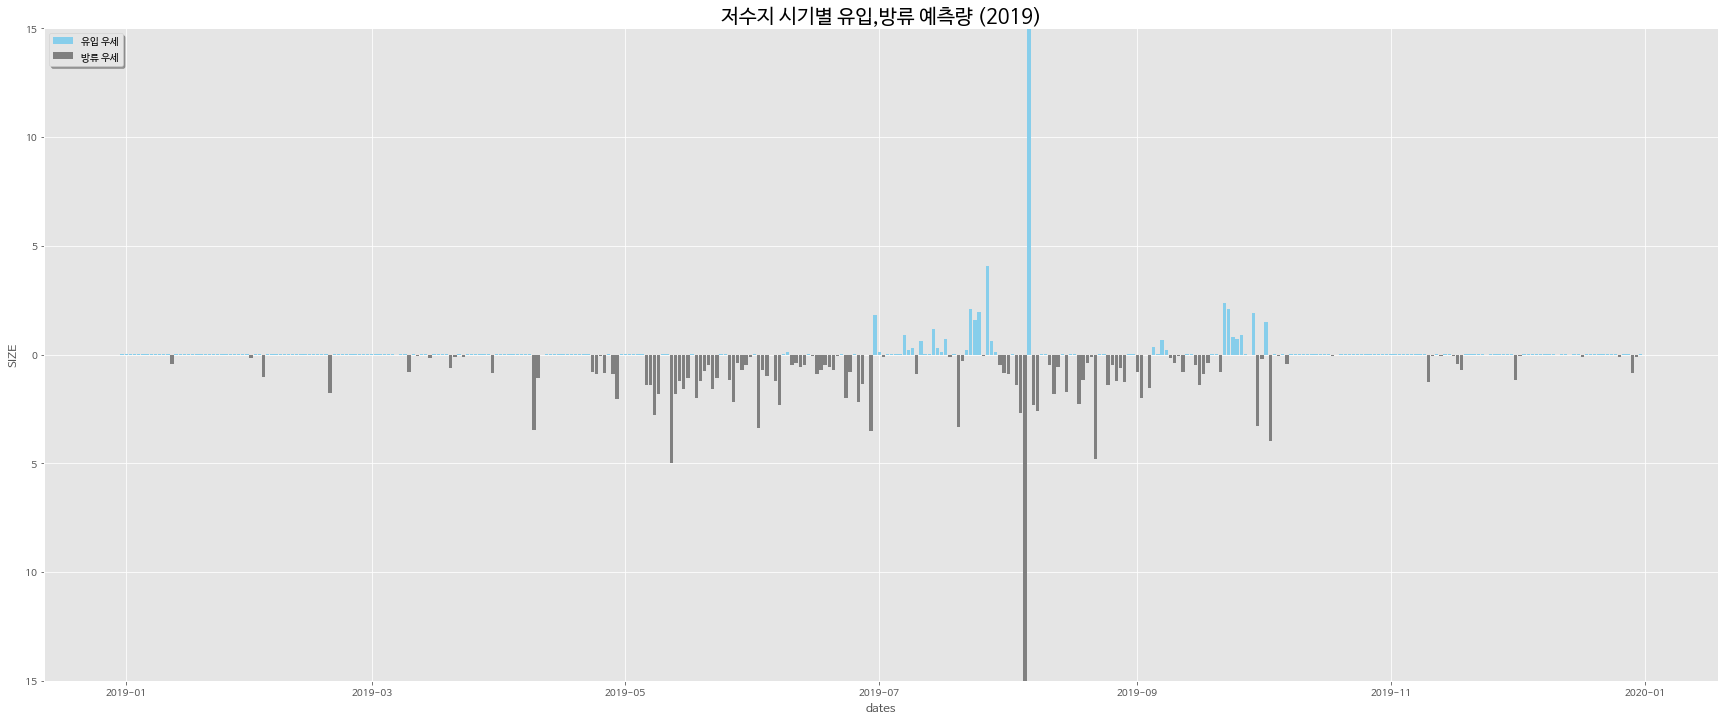

In [69]:
m_df = df[['diff']]
i = 6
plt.figure(figsize=(30,12))
m_df = m_df[365*i:365*(i+1)]
m_df['p_diff'] = [s if s >=0 else 0 for s in m_df['diff']]
m_df['n_diff'] = [s if s < 0 else 0 for s in m_df['diff']]
plt.ylim([-15,15])

year = 2013+i

plt.title('저수지 시기별 유입,방류 예측량 ('+str(year)+')', size=20)

plt.bar(m_df.index, m_df['p_diff'], color='skyblue', label='유입 우세')
plt.bar(m_df.index, m_df['n_diff'], color='gray', label='방류 우세')
plt.xlabel('dates')
plt.ylabel('SIZE')
plt.legend(shadow=True, fancybox=True, loc="upper left")

plt.show() 